0.7004899349764069


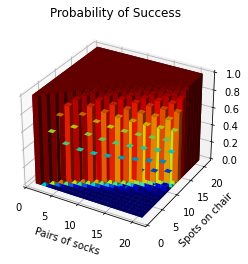

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.cm as cm

# m = number of spots on chair, n = pairs of socks, k = socks currently on chair
# M = max value of m to solve for, N = max value of n to solve for
def Solve(M, N):
    P = [[[0] * (M + 2) for j in range(N)] for i in range(M)]
    for m in range(1, M+1):
        for n in range(1, N+1):
            P[m-1][n-1][m+1] = 0
            for k in range(m, -1, -1):
                if m >= n:
                    P[m-1][n-1][k] = 1
                    continue
                P[m-1][n-1][k] = 2*(n-k)*P[m-1][n-1][k+1]/(2*n - k)
                if k > 0:
                    P[m-1][n-1][k] = P[m-1][n-1][k] + k*P[m-1][n-2][k-1]/(2*n - k)
    Q = [[0] * N for i in range(M)]
    for m in range(M):
        for n in range(N):
            Q[m][n] = P[m][n][0]
    return Q

M = 20
N = 20
Q = Solve(M, N)
print(Q[8][13])
fig = plt.figure()
ax = plt.axes(projection='3d')
_x = np.arange(1, M+1)
_y = np.arange(1, N+1)
_xx, _yy = np.meshgrid(_x, _y)
X, Y = _xx.ravel(), _yy.ravel()
top = np.array(Q).flatten()
bottom = np.zeros_like(top)
width = depth = 1
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(top)   # get range of colorbars so we can normalize
min_height = np.min(top)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in top] 
ax.bar3d(X, Y, bottom, width, depth, top, color=rgba, zsort='average')
plt.title("Probability of Success")
plt.ylabel("Spots on chair")
plt.xlabel("Pairs of socks")
plt.savefig("barchart")
                